# Titanic: Machine Learning from Disaster

In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Input, Dense, Dropout
from keras.models import Model

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv


In [30]:
# Read in datasets
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Explore Data

In [34]:
# Investigate missing data
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [35]:
# Gender
women = train_data.loc[train_data.Sex == 'female']['Survived']
men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_women = sum(women) / len(women)
rate_men = sum(men) / len(men)
print('women survival rate = %f' %rate_women)
print('men survival rate = %f' %rate_men)

women survival rate = 0.742038
men survival rate = 0.188908


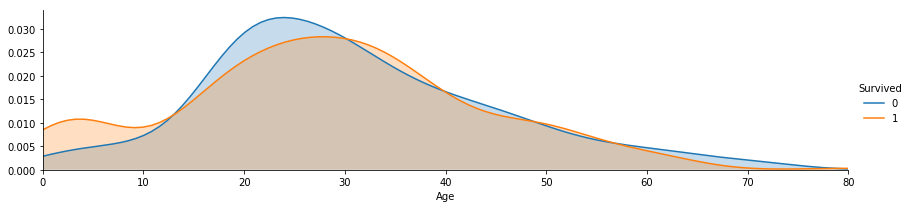

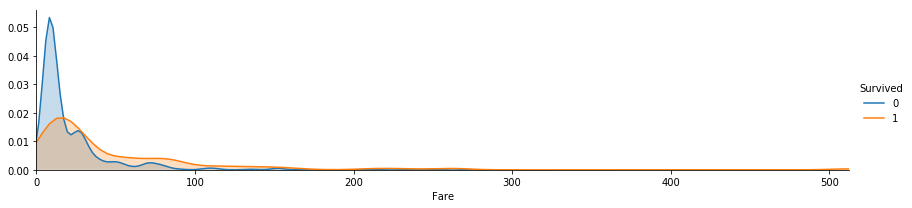

In [36]:
# Age
pt1 = sns.FacetGrid(train_data, hue='Survived', aspect=4)
pt1.map(sns.kdeplot, 'Age', shade=True)
pt1.set(xlim=(0 , train_data['Age'].max()))
pt1.add_legend()

# Fare
pt2 = sns.FacetGrid(train_data, hue='Survived', aspect=4)
pt2.map(sns.kdeplot, 'Fare', shade=True)
pt2.set(xlim=(0 , train_data['Fare'].max()))
pt2.add_legend()

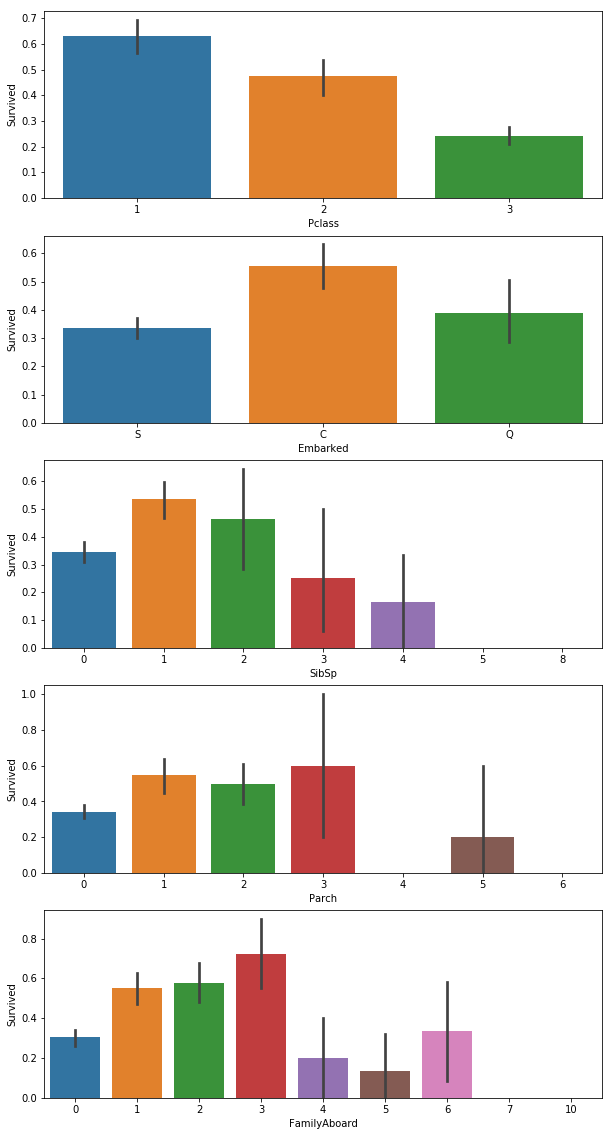

In [46]:
fig, ax = plt.subplots(5, 1, figsize=(10, 20))

sns.barplot(x='Pclass', y='Survived', data=train_data, ax=ax[0])
sns.barplot(x='Embarked', y='Survived', data=train_data, ax=ax[1])
sns.barplot(x='SibSp', y='Survived', data=train_data, ax=ax[2]) # siblings/spouce aboard
sns.barplot(x='Parch', y='Survived', data=train_data, ax=ax[3]) # parents/children aboard

# Look at new feature
train_data['FamilyAboard'] = train_data['SibSp'] + train_data['Parch']
sns.barplot(x='FamilyAboard', y='Survived', data=train_data, ax=ax[4])
fig.show()

## Machine Learning

In [47]:
# Functions for processing data
'''
Processes input of dataset
data is a Pandas DataFrame
returns DataFrame of input feature values
'''
def processInput(data):
    X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]    
    # Enumerate labeled data
    X['Sex'].replace('female', 0, inplace=True)
    X['Sex'].replace('male', 1, inplace=True)
    X['Embarked'].replace('S', 0, inplace=True)
    X['Embarked'].replace('C', 1, inplace=True)
    X['Embarked'].replace('Q', 2, inplace=True)
    # Fill missing data
    X['Embarked'].fillna(3, inplace=True) # create new category
    X['MissingAge'] = X['Age'].isnull().astype(int) # create new feature
    X['Age'].fillna(0, inplace=True)
    X['Fare'].fillna(X['Fare'].mode()[0], inplace=True) # use mode
    # Normalize data
    X = (X - X.mean()) / X.std()
    return X

'''
Processes output of dataset
data is a Pandas DataFrame
returns DataFrame of output
'''
def processOutput(data):
    return data['Survived'].values

'''
Split training data into training and development datasets
data is initial Pandas DataFrame
fractionDev is fraction of data to be in development dataset
returns training data and development data DataFrames
'''
def splitTrainData(data, fractionDev):
    mask = np.random.rand(len(data)) < fractionDev
    train_data = data[~mask]
    dev_data = data[mask]
    return train_data, dev_data

In [48]:
'''
Keras neural network model
'''
def model(inputShape):
    X_input = Input(inputShape)
    X = Dense(10, activation='relu')(X_input)
    X = Dense(1, activation='sigmoid')(X)
    
    model = Model(inputs=X_input, outputs=X)
    return model

In [50]:
# Split and process training data
train_data, dev_data = splitTrainData(train_data, .1)
X_train = processInput(train_data)
Y_train = processOutput(train_data)
X_dev = processInput(dev_data)
Y_dev = processOutput(dev_data)
X_train.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MissingAge
0,0.825244,0.736195,-0.105555,0.435795,-0.478011,-0.485465,-0.569265,-0.498788
1,-1.582134,-1.356454,0.798354,0.435795,-0.478011,0.781871,0.987588,-0.498788
2,0.825244,-1.356454,0.120422,-0.489628,-0.478011,-0.472106,-0.569265,-0.498788
3,-1.582134,-1.356454,0.628871,0.435795,-0.478011,0.421990,-0.569265,-0.498788
4,0.825244,0.736195,0.628871,-0.489628,-0.478011,-0.469632,-0.569265,-0.498788


In [51]:
# Create and train model
nn = model(inputShape=(X_train.shape[1],))
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn.fit(X_train, Y_train, batch_size=32, epochs=100)

Epoch 1/100
722/722 [==============================] - 0s 258us/step - loss: 0.8936 - accuracy: 0.3033
Epoch 2/100
722/722 [==============================] - 0s 46us/step - loss: 0.8370 - accuracy: 0.3061
Epoch 3/100
722/722 [==============================] - 0s 46us/step - loss: 0.7905 - accuracy: 0.3352
Epoch 4/100
722/722 [==============================] - 0s 45us/step - loss: 0.7532 - accuracy: 0.4709
Epoch 5/100
722/722 [==============================] - 0s 47us/step - loss: 0.7208 - accuracy: 0.5388
Epoch 6/100
722/722 [==============================] - 0s 46us/step - loss: 0.6934 - accuracy: 0.5665
Epoch 7/100
722/722 [==============================] - 0s 45us/step - loss: 0.6698 - accuracy: 0.5831
Epoch 8/100
722/722 [==============================] - 0s 45us/step - loss: 0.6494 - accuracy: 0.6330
Epoch 9/100
722/722 [==============================] - 0s 46us/step - loss: 0.6317 - accuracy: 0.6454
Epoch 10/100
722/722 [==============================] - 0s 46us/step - loss: 0.61

722/722 [==============================] - 0s 46us/step - loss: 0.4217 - accuracy: 0.8061
Epoch 81/100
722/722 [==============================] - 0s 48us/step - loss: 0.4211 - accuracy: 0.8061
Epoch 82/100
722/722 [==============================] - 0s 47us/step - loss: 0.4208 - accuracy: 0.8102
Epoch 83/100
722/722 [==============================] - 0s 47us/step - loss: 0.4207 - accuracy: 0.8102
Epoch 84/100
722/722 [==============================] - 0s 48us/step - loss: 0.4199 - accuracy: 0.8102
Epoch 85/100
722/722 [==============================] - 0s 46us/step - loss: 0.4197 - accuracy: 0.8089
Epoch 86/100
722/722 [==============================] - 0s 46us/step - loss: 0.4194 - accuracy: 0.8075
Epoch 87/100
722/722 [==============================] - 0s 45us/step - loss: 0.4192 - accuracy: 0.8075
Epoch 88/100
722/722 [==============================] - 0s 45us/step - loss: 0.4189 - accuracy: 0.8102
Epoch 89/100
722/722 [==============================] - 0s 48us/step - loss: 0.4185 - 

In [52]:
# Evaluate model
_, trainAccuracy = nn.evaluate(X_train, Y_train)
_, devAccuracy = nn.evaluate(X_dev, Y_dev)
print('Train accuracy = %f' %trainAccuracy)
print('Dev accuracy = %f' %devAccuracy)

84/84 [==============================] - 0s 54us/step
Train accuracy = 0.813019
Dev accuracy = 0.833333


In [ ]:
# Generate results for submission
X_test = processInput(test_data)
Y_pred = nn.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': (Y_pred[:, 0] > 0.5).astype(int)})
output.to_csv('submission.csv', index=False)